In [1]:
from matplotlib import pyplot as plt
%matplotlib notebook
import numpy as np
from skimage.io import imread,imsave
from scipy.ndimage import distance_transform_edt
from skimage.color import rgb2hed
from skimage.color import rgb2hsv
from scipy import ndimage as ndi
from skimage.segmentation import mark_boundaries
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage import exposure, img_as_ubyte

In [2]:
#image = imread("/home/robin/Downloads/saturation.png")[:1000,:1000]
img = imread('rgb_good_.jpg')[:1000,:1000]

<IPython.core.display.Javascript object>


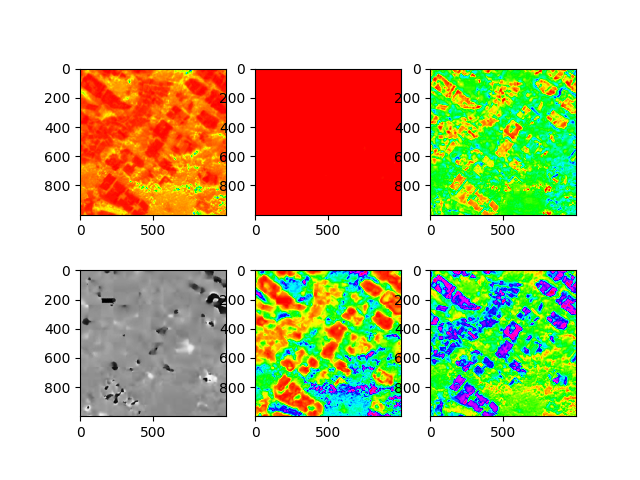

In [3]:
hed = rgb2hed(img)
hsv = rgb2hsv(img)

plt.figure()

plt.subplot(2,3,1)
plt.imshow(hed[...,0], cmap ='hsv')
plt.subplot(2,3,2)
plt.imshow(hed[...,1], cmap ='hsv')
plt.subplot(2,3,3)
plt.imshow(hed[...,2], cmap ='hsv')
plt.subplot(2,3,4)
plt.imshow(hsv[...,0], cmap ='gray')
plt.subplot(2,3,5)
plt.imshow(hsv[...,1], cmap ='hsv')
plt.subplot(2,3,6)
plt.imshow(hsv[...,2], cmap ='hsv')
plt.show()

test = img_as_ubyte(exposure.rescale_intensity(hsv[:,:,1]))
distance = distance_transform_edt(hsv[:,:,1])
coords = peak_local_max(distance, labels=test)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=test)

<IPython.core.display.Javascript object>


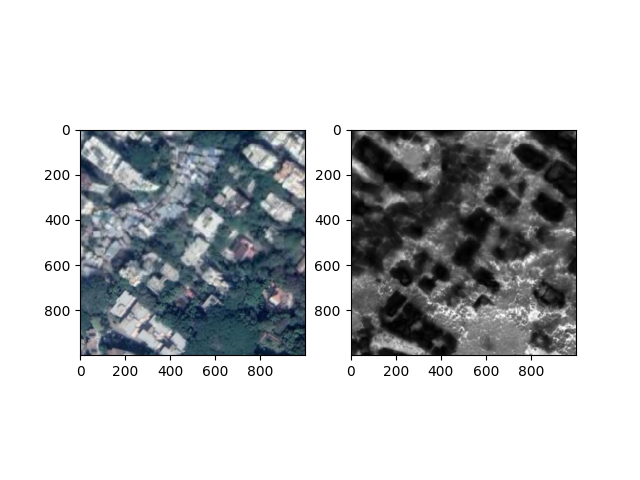

In [4]:
plt.figure()

plt.subplot(1,2,1)
plt.imshow(img, cmap ='gray')
plt.subplot(1,2,2)
plt.imshow(hsv[...,1], cmap ='gray')

plt.show()

In [5]:
from skimage.color import rgb2hed
from skimage.filters import threshold_otsu
from skimage.morphology import opening,closing,disk
from skimage.segmentation import mark_boundaries
from skimage import img_as_float

<IPython.core.display.Javascript object>


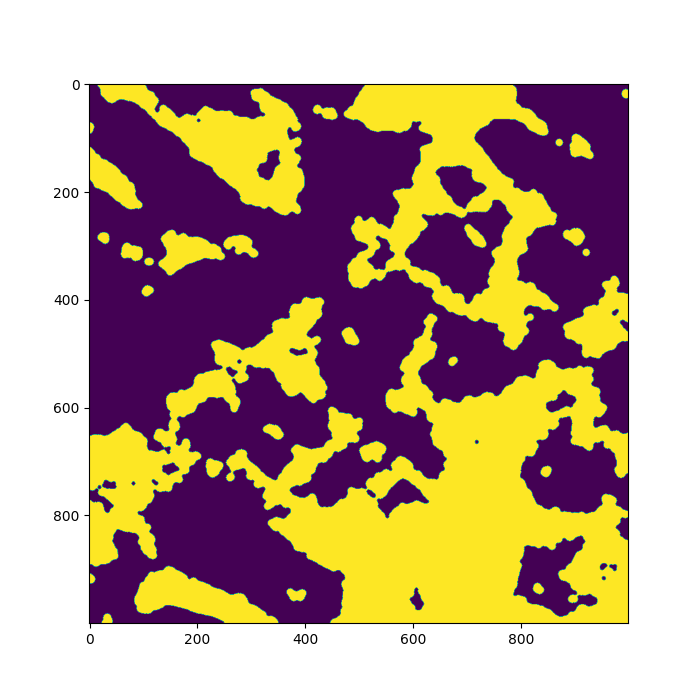

In [6]:
t = threshold_otsu(hsv[...,1])
mask = hsv[...,1]>t
mask = closing(opening(mask, disk(7)), disk(3))
mask1 = img_as_float(mask)

plt.figure(figsize = (7,7))
plt.imshow(mask)
plt.show()

In [7]:
from skimage.util import img_as_uint
maask = img_as_uint(mask)

<IPython.core.display.Javascript object>


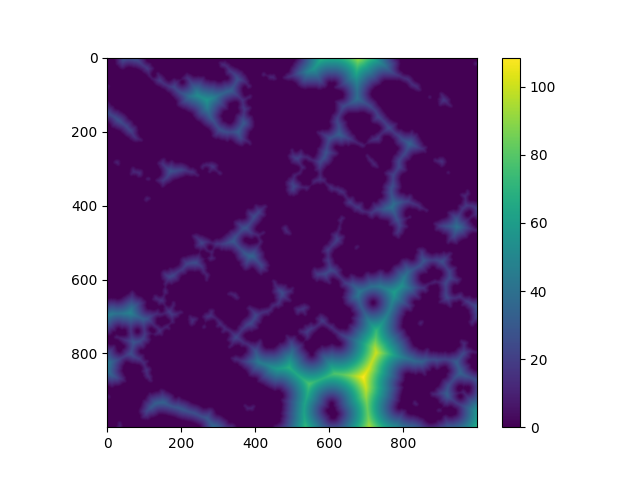

In [8]:
from scipy.ndimage import distance_transform_edt

distance = distance_transform_edt(mask)

plt.figure()
plt.imshow(distance)
plt.colorbar()
plt.show()

In [34]:
import numpy as np
import cv2 as cv
drawing = False # true if mouse is pressed

def toggle(event,x,y,flags,param):
    global drawing, final
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = not drawing
    if drawing:
        final = img.copy()[:,:,::-1]#img_as_ubyte()
    else:
        final = normalised
        

normalised = cv.normalize(distance, None, 0, 255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8U)
final = img.copy()[:,:,::-1]
cv.namedWindow("image", cv.WINDOW_NORMAL)
cv.setMouseCallback('image',toggle)

while True:
    
    cv.imshow("image", final)
    k = cv.waitKey(1) 
    if k == 27:
        break
cv.destroyAllWindows()

In [22]:
from skimage.feature import peak_local_max

markers = peak_local_max(distance,  min_distance=60, indices=True)

/tmp/ipykernel_12644/1222018560.py:3: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  markers = peak_local_max(distance,  min_distance=60, indices=True)


In [23]:
print(markers.shape)

(22, 2)


<IPython.core.display.Javascript object>


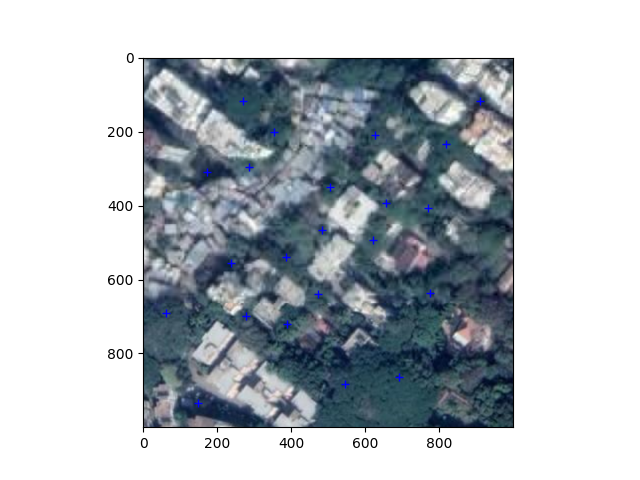

In [24]:
plt.figure()
plt.imshow(img)
for m in markers:
    plt.plot(m[1],m[0],'b+')
plt.show()

In [25]:
from skimage.filters.rank import gradient
from skimage.measure import label
from skimage.segmentation import watershed

/tmp/ipykernel_12644/671696893.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  grad = gradient(mask1,disk(1))
/tmp/ipykernel_12644/671696893.py:2: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  markers = label(peak_local_max(distance, min_distance=20, indices=False))


<IPython.core.display.Javascript object>


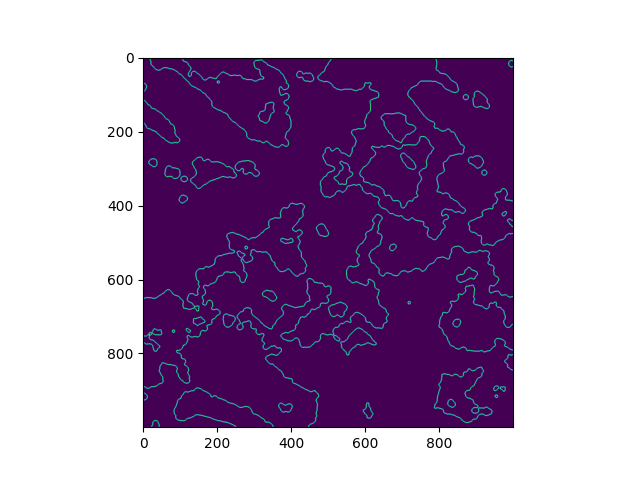

In [30]:
grad = gradient(mask1,disk(1))
markers = label(peak_local_max(distance, min_distance=20, indices=False))

plt.figure()
plt.imshow(grad)
plt.show()

<IPython.core.display.Javascript object>


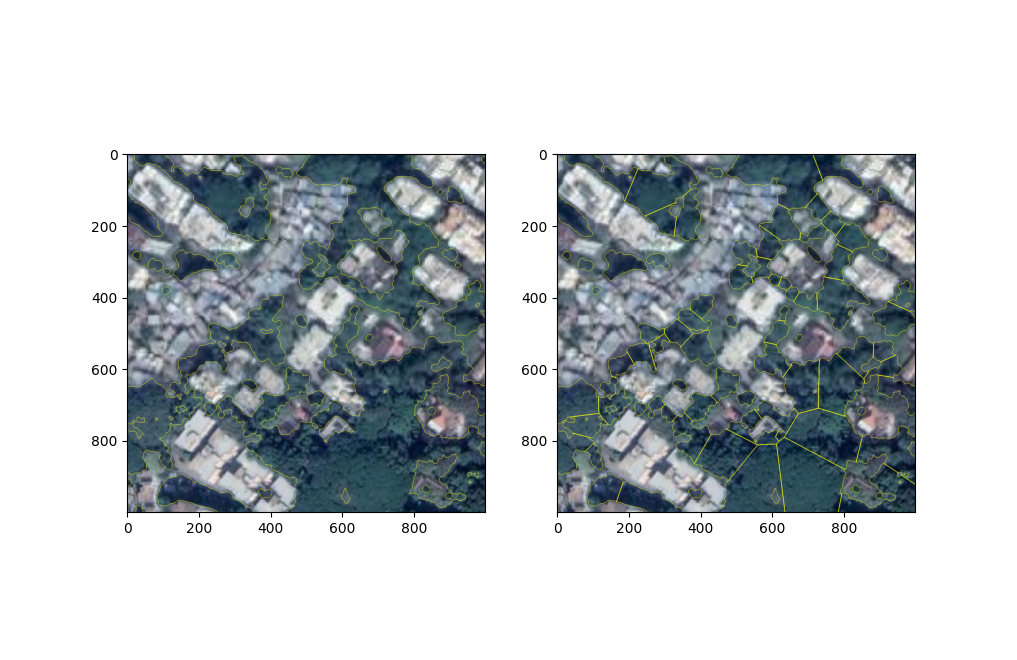

<IPython.core.display.Javascript object>


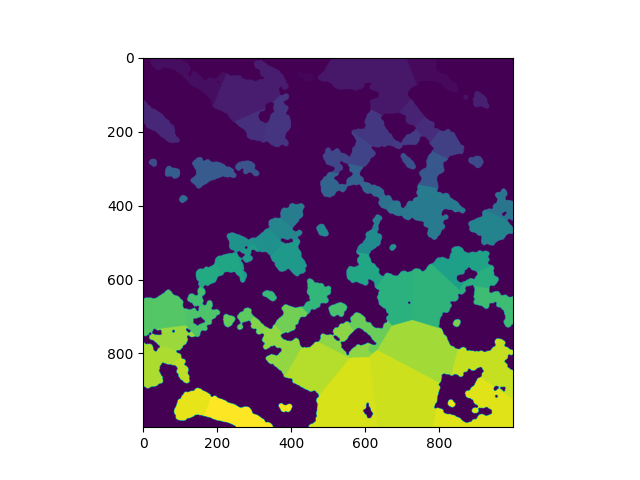

In [33]:
ws = watershed(grad,markers,mask=mask, compactness=0.0000000001)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(mark_boundaries(img, mask))
plt.subplot(1,2,2)
plt.imshow(mark_boundaries(img,ws))
plt.figure()
plt.imshow(ws)
plt.show()

In [22]:
>>> from skimage import data
>>> from skimage.morphology import disk, ball
>>> from skimage.filters.rank import gradient
>>> import numpy as np
>>> img = data.camera()
>>> rng = np.random.default_rng()
>>> volume = rng.integers(0, 255, size=(10,10,10), dtype=np.uint8)
>>> out = gradient(img, disk(5))
>>> out_vol = gradient(volume, ball(5))

In [2]:
from skimage.filters import threshold_multiotsu
from scipy import ndimage as ndi
from skimage import (
    color, feature, filters, measure, morphology, segmentation, util
)
from skimage.io import imread,imsave
from skimage.color import rgb2hsv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
img = imread("/home/robin/Pictures/test.png")[...,:3]
hsv = rgb2hsv(img)


In [4]:
image = hsv[:,:,1].copy()

<IPython.core.display.Javascript object>


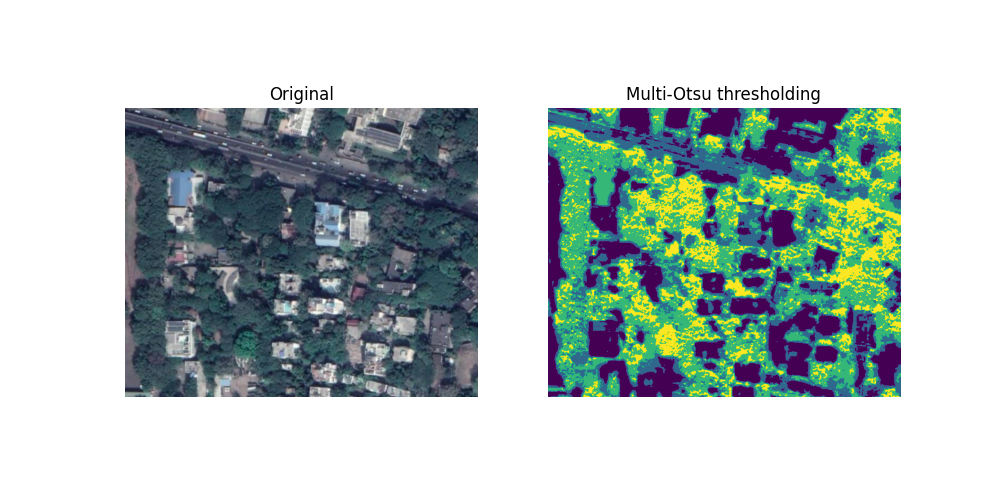

In [6]:
thresholds = threshold_multiotsu(image, classes=4)
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(regions)
ax[1].set_title('Multi-Otsu thresholding')
ax[1].axis('off')
plt.show()

<IPython.core.display.Javascript object>


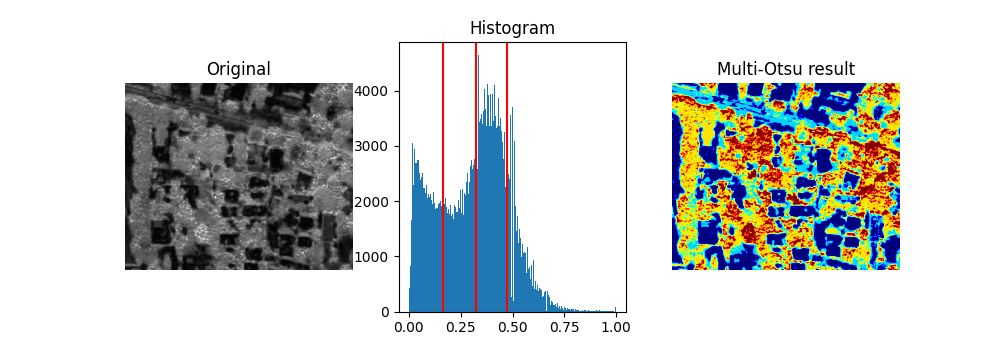

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()


In [8]:
thresholds

array([0.16601562, 0.32617188, 0.47460938])

In [20]:
not_tree = image <= thresholds[1]
label = measure.label(not_tree)
mask = ~closing(opening(not_tree, disk(7)), disk(3))

In [9]:
a = (image <= thresholds[0] )
b = (image > thresholds[0]) & (image <= thresholds[1] )
c = (image > thresholds[1]) & (image <= thresholds[2] )
#d = (image > thresholds[2]) & (image <= thresholds[3])
e = (image > thresholds[2] )

label1 = measure.label(a)
label2 = measure.label(b)
label3 = measure.label(c)
#label4 = measure.label(d)
label5 = measure.label(e)


<IPython.core.display.Javascript object>


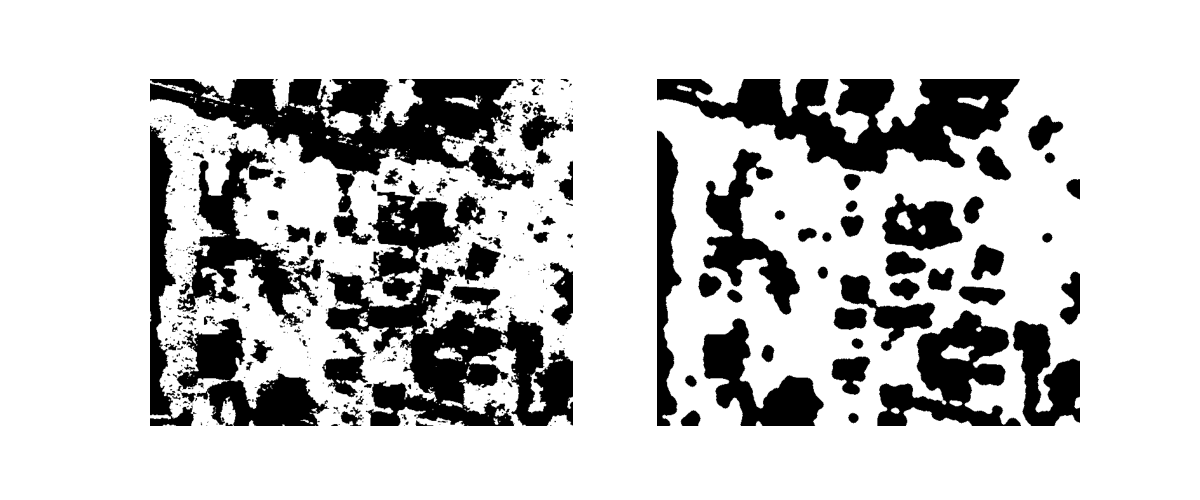

(-0.5, 665.5, 546.5, -0.5)

In [21]:
from skimage.segmentation import mark_boundaries

fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax[0].imshow(~not_tree, cmap = "gray")
ax[0].axis('off')
ax[1].imshow(mask, cmap = 'gray')
ax[1].axis('off')

In [24]:
len(mark_boundaries(img,mask))

547

In [31]:
wshed = watershed(image, mask= mask)

<IPython.core.display.Javascript object>


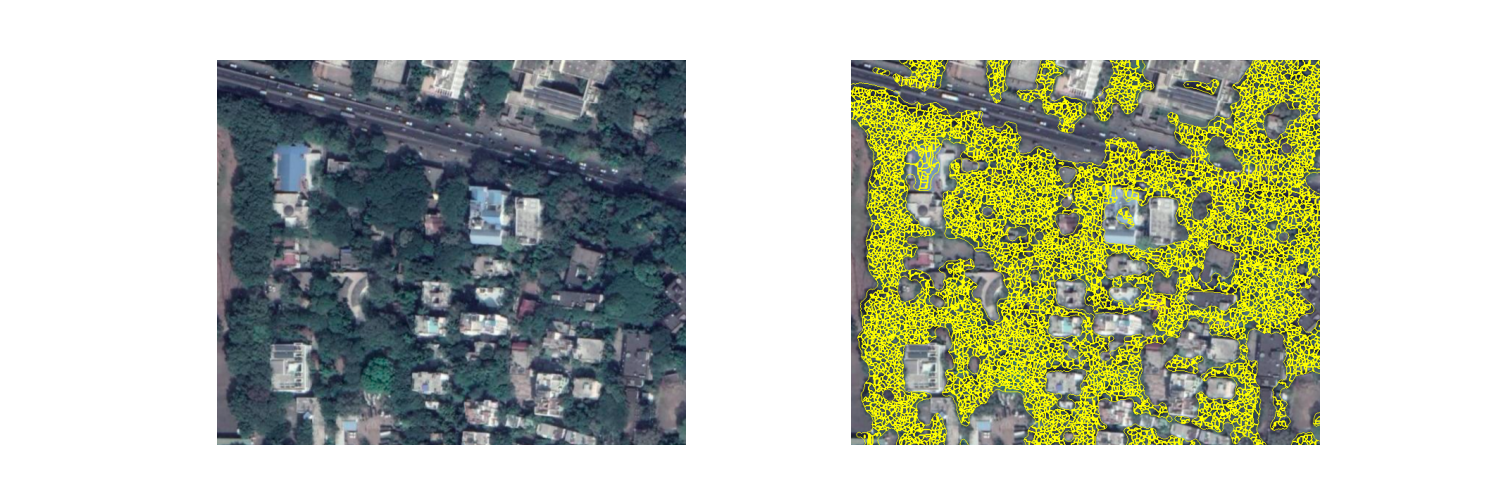

In [32]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].imshow(img)
ax[0].axis('off')
ax[1].imshow(mark_boundaries(img,wshed))
ax[1].axis('off')


plt.show()

In [53]:
from skimage.util import img_as_ubyte
import cv2
image = img_as_ubyte(img)
maask = img_as_ubyte(d)

In [54]:
maasked = cv2.bitwise_and(img[...,::-1], img[...,::-1], mask=maask)
cv2.imshow("hi", maasked)
cv2.waitKey(0)
cv2.destroyAllWindows()

<IPython.core.display.Javascript object>


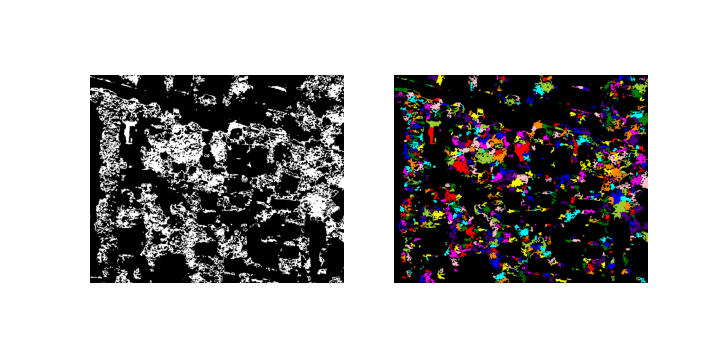

In [55]:
distance = ndi.distance_transform_edt(d)

local_max_coords = feature.peak_local_max(distance, min_distance=7)
local_max_mask = np.zeros(distance.shape, dtype=bool)
local_max_mask[tuple(local_max_coords.T)] = True
markers = measure.label(local_max_mask)

segmented_cells = segmentation.watershed(-distance, markers, mask=d)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(d, cmap='gray')

ax[0].axis('off')
ax[1].imshow(color.label2rgb(segmented_cells, bg_label=0))

ax[1].axis('off')
plt.show()

In [56]:
print(segmented_cells.max())

933


<IPython.core.display.Javascript object>


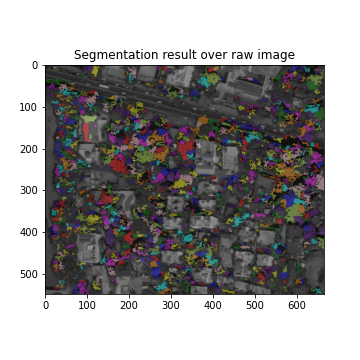

In [57]:
color_labels = color.label2rgb(segmented_cells, image, alpha=0.4, bg_label=0)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(color_labels)
ax.set_title('Segmentation result over raw image')
plt.show()

In [ ]:
wate

<IPython.core.display.Javascript object>


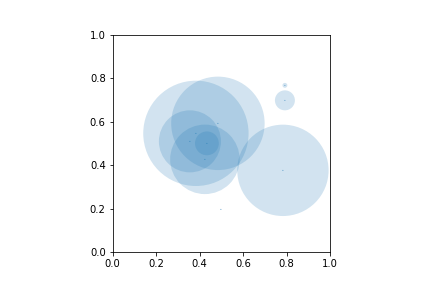

In [3]:
# importing the necessary modules
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import time
import sys
import random
import matplotlib
matplotlib.use('nbagg')


class MouseEvent:
	
	# initialization
	def __init__(self):
		(figure, axes) = plt.subplots()
		axes.set_aspect(1)
		figure.canvas.mpl_connect('button_press_event', self.press)
		figure.canvas.mpl_connect('button_release_event', self.release)

	# start event to show the plot
	def start(self):
		plt.show() # display the plot

	# press event will keep the starting time when u
	# press mouse button
	def press(self, event):
		self.start_time = time.time()

	# release event will keep the track when you release
	# mouse button
	def release(self, event):
		self.end_time = time.time()
		self.draw_click(event)

	# drawing the plot
	def draw_click(self, event):
		# size = square (4 * duration of the time button
		# is keep pressed )
		size = 4 * (self.end_time - self.start_time) ** 2
		
		# create a point of size=0.002 where mouse button
		# clicked on the plot
		c1 = plt.Circle([event.xdata, event.ydata], 0.002,)
		
		# create a circle of radius 0.02*size
		c2 = plt.Circle([event.xdata, event.ydata], 0.02 * size, alpha=0.2)
		event.canvas.figure.gca().add_artist(c1)
		event.canvas.figure.gca().add_artist(c2)
		event.canvas.figure.show()


cbs = MouseEvent()

# start the event
cbs.start()
